# Logistic Regression

Review:

- In machine learning, we often have **regression** problems and **classification** problems.  These often need different 
kinds of algorithms to solve.

- **Regression**: the answer you are trying to predict is a number.  For example, our housing price prediction problem was
a regression problem.

- **Classification**: the answer you are trying to predict is categorical.  This includes problems where the answer is one
of many categories, or a simple binary yes/no or true/false problem.

  - Examples of classification problems:
  
      - Classify an image as a dog or a cat.
  
      - Classify an email as spam or not-spam.
      
      - Classify a credit card or debit card transaction as fraudulent or not.
      
      - Classify a tumor as malignant or not.
      
  - All of these are **binary classification** problems.

## Classification

- In classification problems, we use the term **class** or **category** for the answer that we are predicting (that our model
will eventually predict).

- We will focus on **binary classification** for the moment.  We will denote our two classes as "1" and "0" (one and zero, positive
and negative) which
align nicely with questions that can be phrased as yes/no or true/false.  For questions that don't (e.g., cat-vs-dog), we can
arbitrarily pick one of them to be the "positive" class (1)  and the other to be the "negative" class (0).  

  - It is understood that the terms "positive" and "negative" don't have "good" and "bad" connotations --- everything we're going to learn would work the same way if we swapped the 0/1 classes around.


- Even though we are technically predicting a number (0 or 1), using a regression algorithm like linear regression really won't
work here.

## Logistic regression 

- Instead, we need a dedicated **classification** algorithm.  The one we will study first
is, oddly named, **logistic regression**, yet this is not a regression algorithm.

- The name comes from the fact that logistic regression fits a **logistic** (S-shaped) curve 
to a data set, in the same way that linear regression fits a line to a data set.

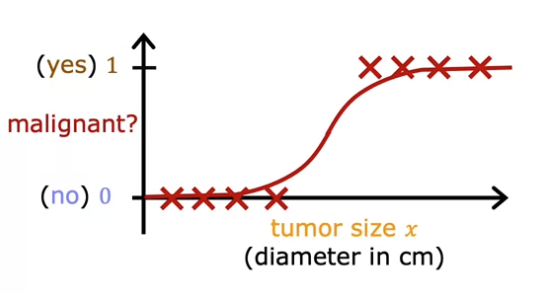



## Math

- We first have to define the mathematical function that creates this S-shaped curve, 
the **sigmoid** function, or sometimes called the **logistic** function.

- We usually write this function like this:

$$\sigma(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{e^x+1} = 1 - \sigma(-x)$$

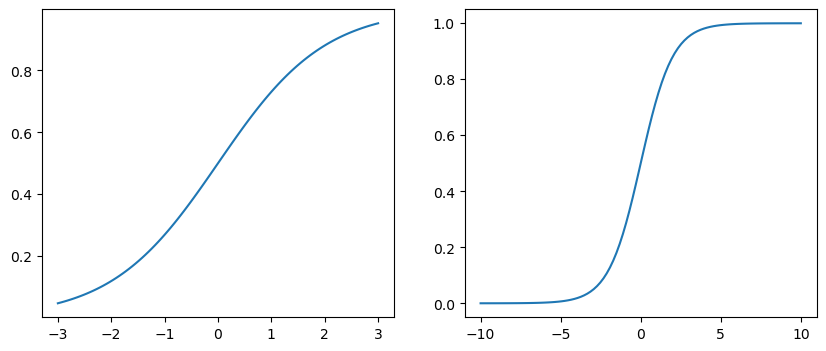

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))

x_plot1 = np.linspace(-3, 3, 100)
x_plot2 = np.linspace(-10, 10, 100)
y_plot1 = sigmoid(x_plot1)
y_plot2 = sigmoid(x_plot2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(x_plot1, y_plot1)
ax2.plot(x_plot2, y_plot2)
plt.show()

- Notice this function only gives outputs between 0 and 1.  

- Furthermore, notice that as soon as $x$ gets more extreme than about 3 or -3, the sigmoid
function gives numbers that are very close to 1 or 0.  Also, $\sigma(0)=0.5$.

- This function also plays a large role in neural networks (next topic), and for reasons
that will become clear when we study neural networks, we sometimes will denote this function
by $g(z) = \dfrac{1}{1 + e^{-z}}$.

## Logistic regression model

- Recall that in linear regression, we used the model
$$f_{w, b}(x) = wx + b$$
or when we rewrote this using the dot product and combined the $b$ term into the $w$ vector,
$$f_{w}(x) = w\cdot x \qquad \text{(this is now the dot product)}$$

- What we will do in logistic regression is take our linear regression model and pass it
through the sigmoid function:

  - Define $z = w\cdot x$,
  
  - and $g(z) = \dfrac{1}{1+e^{-z}}$
  
  - And so our complete model for logistic regression is:
  
  $$f_{w}(x) = g(w \cdot x) = \dfrac{1}{1+e^{-w \cdot x}}$$
  
  Remember that $w$ and $x$ are vectors of length $n+1$, since we have $n$ features.  We renamed $b$
  as $w_0$, and we will always have $x_0$ set to 1 in our data, which when we take the dot product
  $w \cdot x$, always multiplies $w_0$ by 1. 
  
- Remember what this function $f$ does: it takes a vector of features $x$ and outputs a number
between 0 and 1.

## Interpreting the output of this model

- Think of the output of $f(x)$ as the probability that the class is 1 (the positive class).

- So in our example where $x$ is the size of a tumor and $y$ is 0 for a non-malignant tumor
and 1 for a malignant tumor, we can interpret $\hat{y} = f(x)$ as the probability that a
tumor of size $x$ is malignant.

- Quick probability notation:

  - We use $P(\text{something})$ to denote the probability of something happening.
  <P>
  
- You will sometimes see the notation $f(x) = P(y=1 \mid x;w)$ for logistic regression;
this means that we interpret $f(x)$ as the probability that $y$ (the correct output for input $x$)
as being equal to 1, given the input features $x$ and parameters $w$.

## The decision boundary

- Remember our model $f(x)$ outputs a number between 0 and 1, but we really want the model
to only predict 0 or 1.  

- The most common thing to do here is that when $f(x) \geq 0.5$, we predict 1, and when 
$f(x) < 0.5$, we predict 0.  

- Mathematically, here's what this means:

$$\begin{align*}
f(x) & \geq  0.5 \\
g(z) & \geq 0.5 \\
z & \geq 0 & & \qquad \text{ look at the graph} \\
w \cdot x & \geq 0
\end{align*}$$

  In other words, our model predicts 1 whenever $w \cdot x \geq 0$, and conversely, predicts 0
  whenever $w \cdot x < 0$.

### Visualization

Consider a situation with two input features $x_1$ and $x_2$.  Suppose our data
looks likes this, with the x's denoting the positive class and the o's denoting the 
negative class:

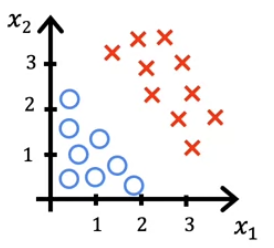

We know 

$$f(x) = g(z) = g(w\cdot x) = g(w_0 x_0 + w_1 x_1 + w_2 x_2)$$

As an example, suppose $w_0 = -3$, $w_1 = 1$, and $w_2=1$. Also, remember $x_0$ is always 1 
(it's a "fake" feature), so we will be able to use this to simplify.

Let's look at how logistic regression makes predictions.  In particular, we'd like to 
visualize where $z=w\cdot x \geq 0$ and where $z=w \cdot x < 0$.  To do this, it's easiest to examine
a line called the **decision boundary**, which is where $z=w\cdot x=0$.

$$\begin{align*}
z &= w\cdot x  \\
z &= w_0 x_0 + w_1 x_1 + w_2 x_2  \\
z &= -3 + x_1 + x_2 = 0 \\
 &\quad x_1 + x_2 = 3
\end{align*}$$

If you plot this line on the graph, you will see it divides the two classes perfectly.

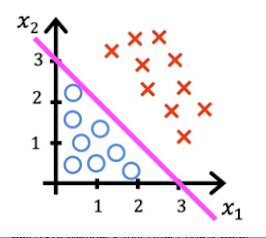

### Non-linear decision boundaries

- We can also do this for data that requires a curve of some sort to separate
the two classes:

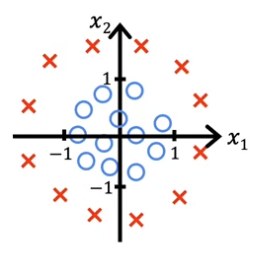

- Here, we would need a circular decision boundary.  Just like adding in quadratic (or higher 
order polynomial) features to linear regression can help us fit non-linear data sets, the 
same principles apply here.

- Suppose we use the features $x_1^2$ and $x_2^2$ rather than just $x_1$ and $x_2$ (or you can
imagine we use $x_1$ and $x_2$ but set their weights to zero):

  $z = w\cdot x$
  
  $z = w_0 x_0 + w_1 x_1^2 + w_2x_2^2$
  
$$\begin{align*}
z &= w\cdot x  \\
z &= w_0 x_0 + w_1 x_1^2 + w_2x_2^2  \\
\end{align*}$$

And suppose we set $w_0 = -1$, $w_1=1$, and $w_2=1$:<p>
$$\begin{align*}
z &= w_0 x_0 + w_1 x_1^2 + w_2x_2^2  \\
z &= -1 + x_1^2 + x_2^2=0  \\
 &\quad x_1^2 + x_2^2 = 1
\end{align*}$$
    
This decision boundary will look something like this:
    
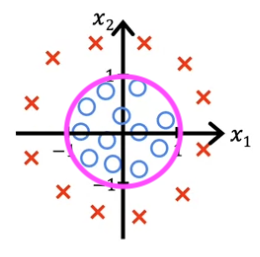

- It's worth mentioning that if you don't use any higher-order features, 
then logistic regression's decision boundary will always be a straight line
(similar how in linear regression, without higher order features, the model will
always be a straight line).